In [10]:
from textblob import TextBlob
import sys, tweepy, csv, re
import matplotlib.pyplot as plt

Enter keyword to search about: mahesh
Enter how many tweets to analyze: 100
Currently people are reacting on mahesh by analyzing 100 Tweets.
Positive


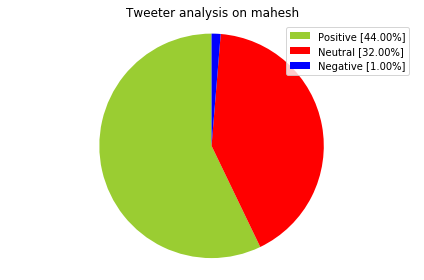

In [17]:
def percentage(part, whole):
    return 100*float(part)/float(whole)

consumerkey = "Oa4J31KG75gItPglSmcWjfG5Y"
consumerSecret = "3fyaiV6RlbP1lyIMZ6fQ05QjyiGpDuONaVEOzoPmG2crgCWf3T"
accessToken = "1113394426879967232-rYYl6YnHy4FZpVgcHcPFKaEwcZ4nbV"
accessTokenSecret = "mylhmd1ISwj0Id10xBbapv7hSsUcsCW53uf2hfb0ap0zH"

auth = tweepy.OAuthHandler(consumerkey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm=input("Enter keyword to search about: ")
noofsearchTerms=int(input("Enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en").items(noofsearchTerms)

positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
#     print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity

    if(analysis.sentiment.polarity ==0):
        neutral+=1
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1

positive = percentage(positive, noofsearchTerms)
negative = percentage(negative, noofsearchTerms)
neutral = percentage(neutral, noofsearchTerms)
polarity = polarity / noofsearchTerms

positive=format(positive, ".2f")
negative=format(negative, ".2f")
neutral=format(neutral, ".2f")

print("Currently people are reacting on "+searchTerm+" by analyzing "+str(noofsearchTerms)+" Tweets.")

if(polarity==0.00):
    print("Neutral")
elif (polarity < 0.00):
    print("Negative")
elif (polarity > 0.00 ):
    print("Positive")
        
labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'red', 'blue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Tweeter analysis on "+searchTerm)
plt.axis("equal")
plt.tight_layout()
plt.show()